In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv('/SalesKaggle3.csv')

# Display basic information about the df
print(df.info())
print(df.describe())

# Includes categorical variable
df.describe(include='all')

# Display the first few rows of the dfframe
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198917 entries, 0 to 198916
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order             198917 non-null  int64  
 1   File_Type         198917 non-null  object 
 2   SKU_number        198917 non-null  int64  
 3   SoldFlag          75996 non-null   float64
 4   SoldCount         75996 non-null   float64
 5   MarketingType     198917 non-null  object 
 6   ReleaseNumber     198917 non-null  int64  
 7   New_Release_Flag  198917 non-null  int64  
 8   StrengthFactor    198917 non-null  float64
 9   PriceReg          198917 non-null  float64
 10  ReleaseYear       198917 non-null  int64  
 11  ItemCount         198917 non-null  int64  
 12  LowUserPrice      198917 non-null  float64
 13  LowNetPrice       198917 non-null  float64
dtypes: float64(6), int64(6), object(2)
memory usage: 21.2+ MB
None
               Order    SKU_number      SoldFlag     

In [3]:
# Check for missing values
print(df.isnull().sum())

Order                    0
File_Type                0
SKU_number               0
SoldFlag            122921
SoldCount           122921
MarketingType            0
ReleaseNumber            0
New_Release_Flag         0
StrengthFactor           0
PriceReg                 0
ReleaseYear              0
ItemCount                0
LowUserPrice             0
LowNetPrice              0
dtype: int64


In [4]:
# prompt: fill missing values

# Fill missing values in numerical columns with the mean
numerical_cols = df.select_dtypes(include=['number']).columns
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].mean())

# Fill missing values in categorical columns with the mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Verify if there are any more missing values
print(df.isnull().sum())

Order               0
File_Type           0
SKU_number          0
SoldFlag            0
SoldCount           0
MarketingType       0
ReleaseNumber       0
New_Release_Flag    0
StrengthFactor      0
PriceReg            0
ReleaseYear         0
ItemCount           0
LowUserPrice        0
LowNetPrice         0
dtype: int64


In [5]:
# Number of entries
print(df.shape)

(198917, 14)


In [6]:
# Total number of products & unique values of the columns
print("*****************")
print(df.nunique())

*****************
Order               198917
File_Type                2
SKU_number          133360
SoldFlag                 3
SoldCount               38
MarketingType            2
ReleaseNumber           71
New_Release_Flag         2
StrengthFactor      197424
PriceReg             11627
ReleaseYear             85
ItemCount              501
LowUserPrice         12102
LowNetPrice          15403
dtype: int64


In [7]:
# Count of the historical and active state
print("*****************")
print(df[df['File_Type'] == 'Historical']['SKU_number'].count())
print(df[df['File_Type'] == 'Active']['SKU_number'].count())

*****************
75996
122921


In [8]:
# Split the dfset into two parts based on the file_type
df_hist = df[df['File_Type'] == 'Historical']
df_act = df[df['File_Type'] == 'Active']
print(df_hist.head())
print(df_act.head())

   Order   File_Type  SKU_number  SoldFlag  SoldCount MarketingType  \
0      2  Historical     1737127       0.0        0.0             D   
1      3  Historical     3255963       0.0        0.0             D   
2      4  Historical      612701       0.0        0.0             D   
3      6  Historical      115883       1.0        1.0             D   
4      7  Historical      863939       1.0        1.0             D   

   ReleaseNumber  New_Release_Flag  StrengthFactor  PriceReg  ReleaseYear  \
0             15                 1        682743.0     44.99         2015   
1              7                 1       1016014.0     24.81         2005   
2              0                 0        340464.0     46.00         2013   
3              4                 1        334011.0    100.00         2006   
4              2                 1       1287938.0    121.95         2010   

   ItemCount  LowUserPrice  LowNetPrice  
0          8         28.97        31.84  
1         39          0.00

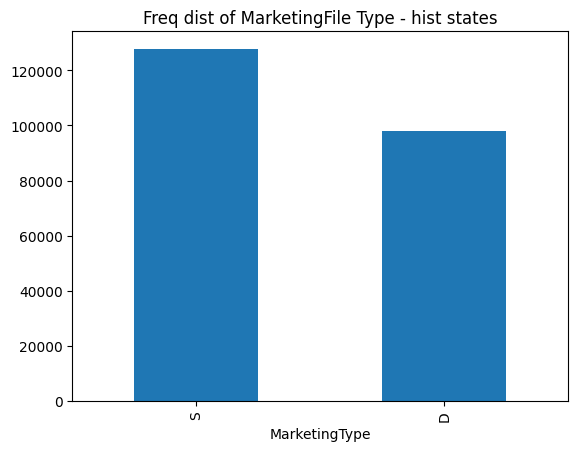

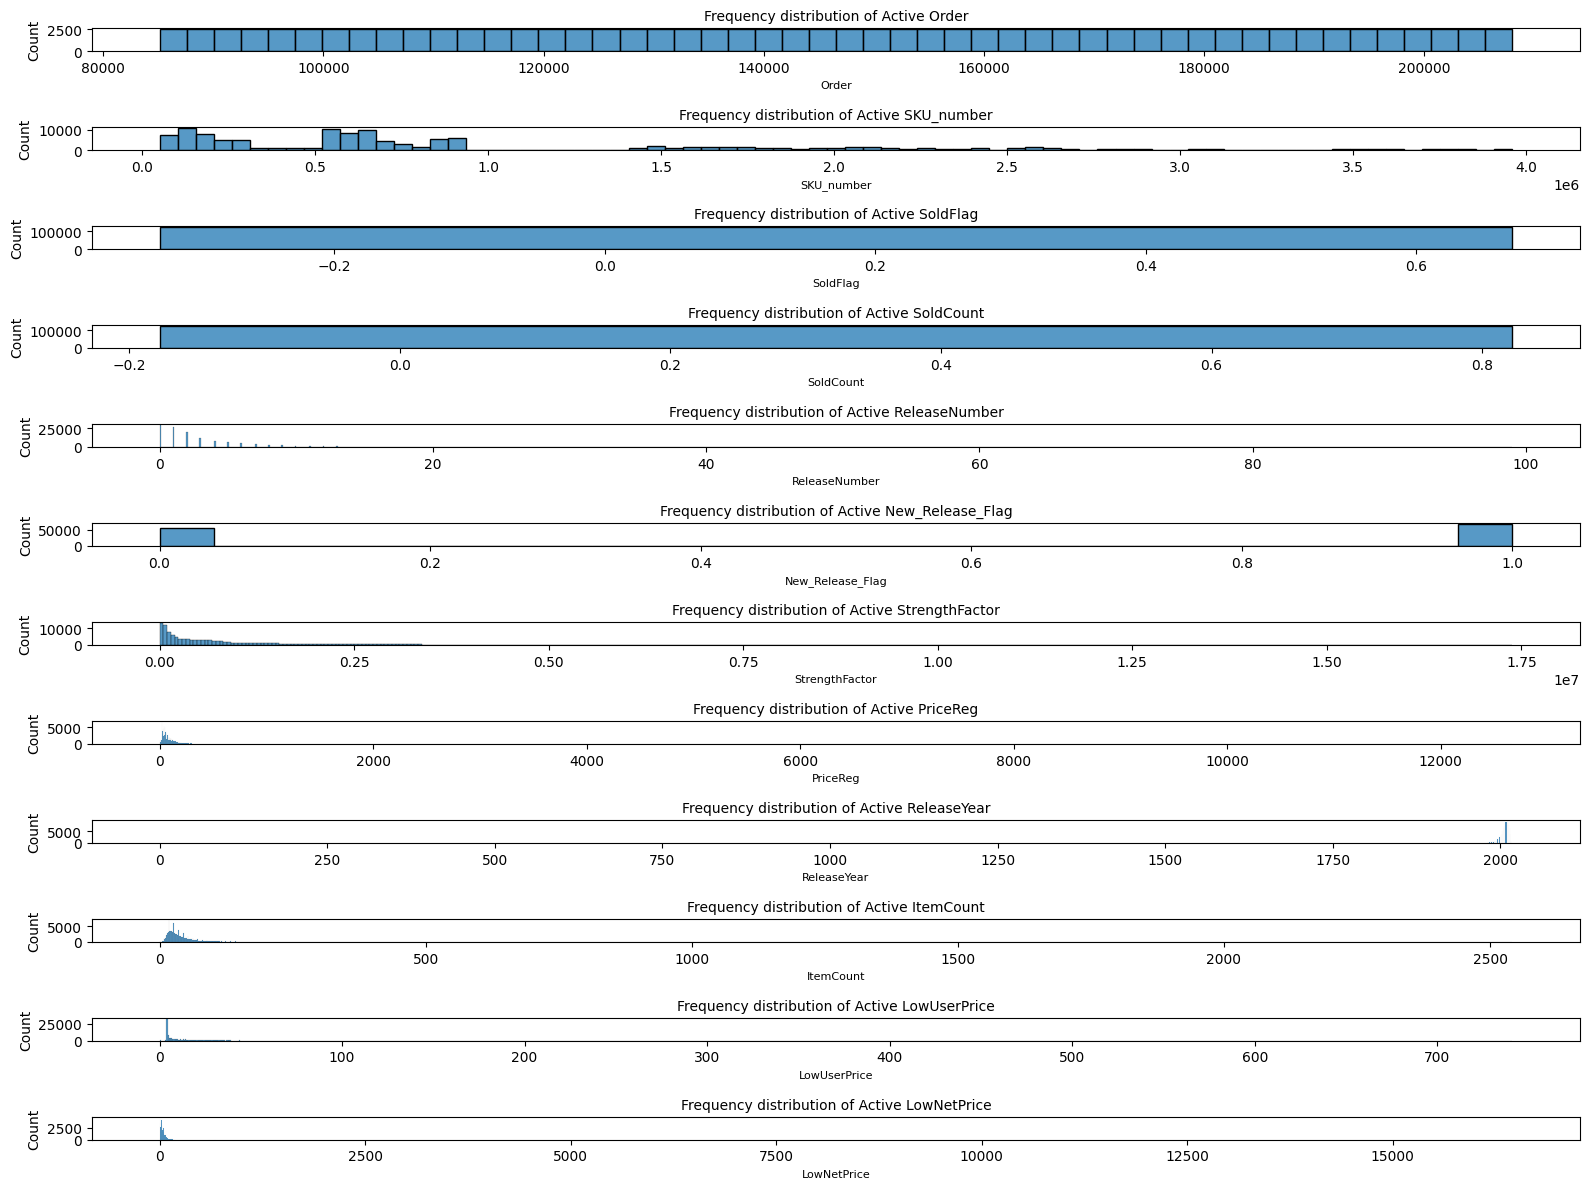

In [9]:
df['MarketingType'].value_counts().plot.bar(title="Freq dist of Marketing Type")
df['File_Type'].value_counts().plot.bar(title="Freq dist of File Type")
df['New_Release_Flag'].value_counts().plot.bar(title="Freq dist of New_Release_Flag")
df_act['MarketingType'].value_counts().plot.bar(title="Freq dist of MarketingFile Type - active states")
df_hist['MarketingType'].value_counts().plot.bar(title="Freq dist of MarketingFile Type - hist states")
col_names = ['StrengthFactor','PriceReg', 'ReleaseYear', 'ItemCount', 'LowUserPrice', 'LowNetPrice']
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Split the DataFrame into two parts based on the 'File_Type' column
df_hist = df[df['File_Type'] == 'Historical'].copy()
df_act = df[df['File_Type'] == 'Active'].copy()

# Replace infinite values with NaNs for both DataFrames
df_hist.replace([np.inf, -np.inf], np.nan, inplace=True)
df_act.replace([np.inf, -np.inf], np.nan, inplace=True)

# Select only numeric columns for filling NaNs
numeric_cols_hist = df_hist.select_dtypes(include=[np.number]).columns
numeric_cols_act = df_act.select_dtypes(include=[np.number]).columns

# Fill NaNs with mean for only numeric columns
df_hist[numeric_cols_hist] = df_hist[numeric_cols_hist].fillna(df_hist[numeric_cols_hist].mean())
df_act[numeric_cols_act] = df_act[numeric_cols_act].fillna(df_act[numeric_cols_act].mean())

# List of column names to plot for Active data, excluding 'File_Type'
col_names_act = df_act.select_dtypes(include=[np.number]).columns

fig, ax = plt.subplots(len(col_names_act), figsize=(16, 12))

for i, col_val in enumerate(col_names_act):
  sns.histplot(df_act[col_val], ax=ax[i])
  ax[i].set_title('Frequency distribution of Active ' + col_val, fontsize=10)
  ax[i].set_xlabel(col_val, fontsize=8)

plt.tight_layout()
plt.show()


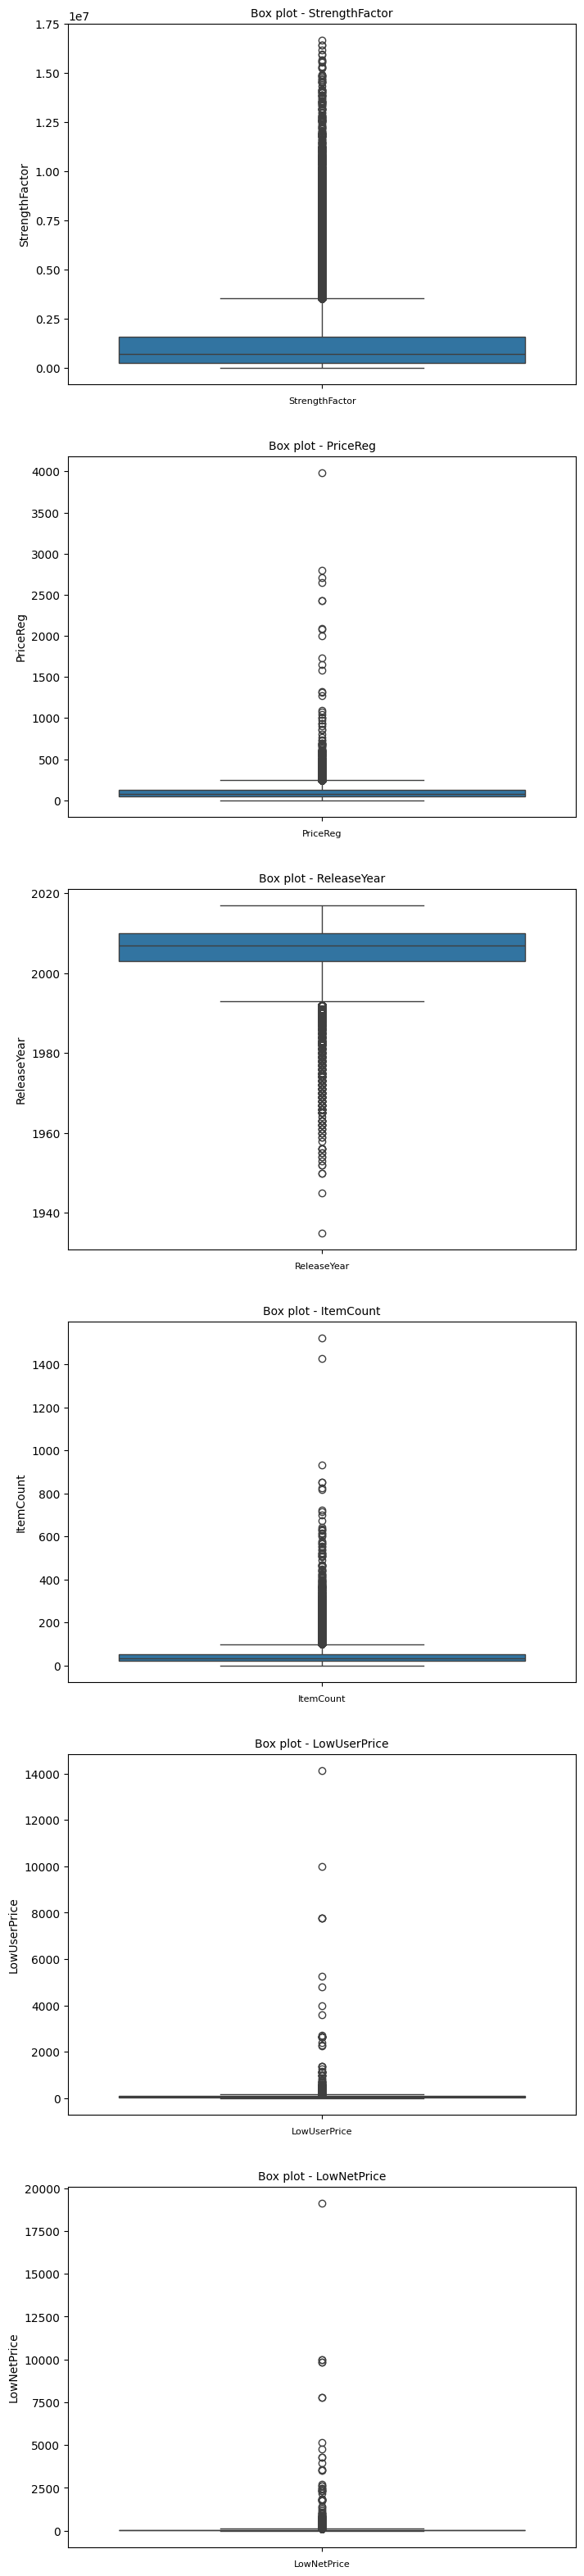

In [10]:
col_names = ['StrengthFactor','PriceReg', 'ReleaseYear', 'ItemCount', 'LowUserPrice', 'LowNetPrice']

fig, ax = plt.subplots(len(col_names), figsize=(8,40))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=df_hist[col_val], ax=ax[i])
    ax[i].set_title('Box plot - '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

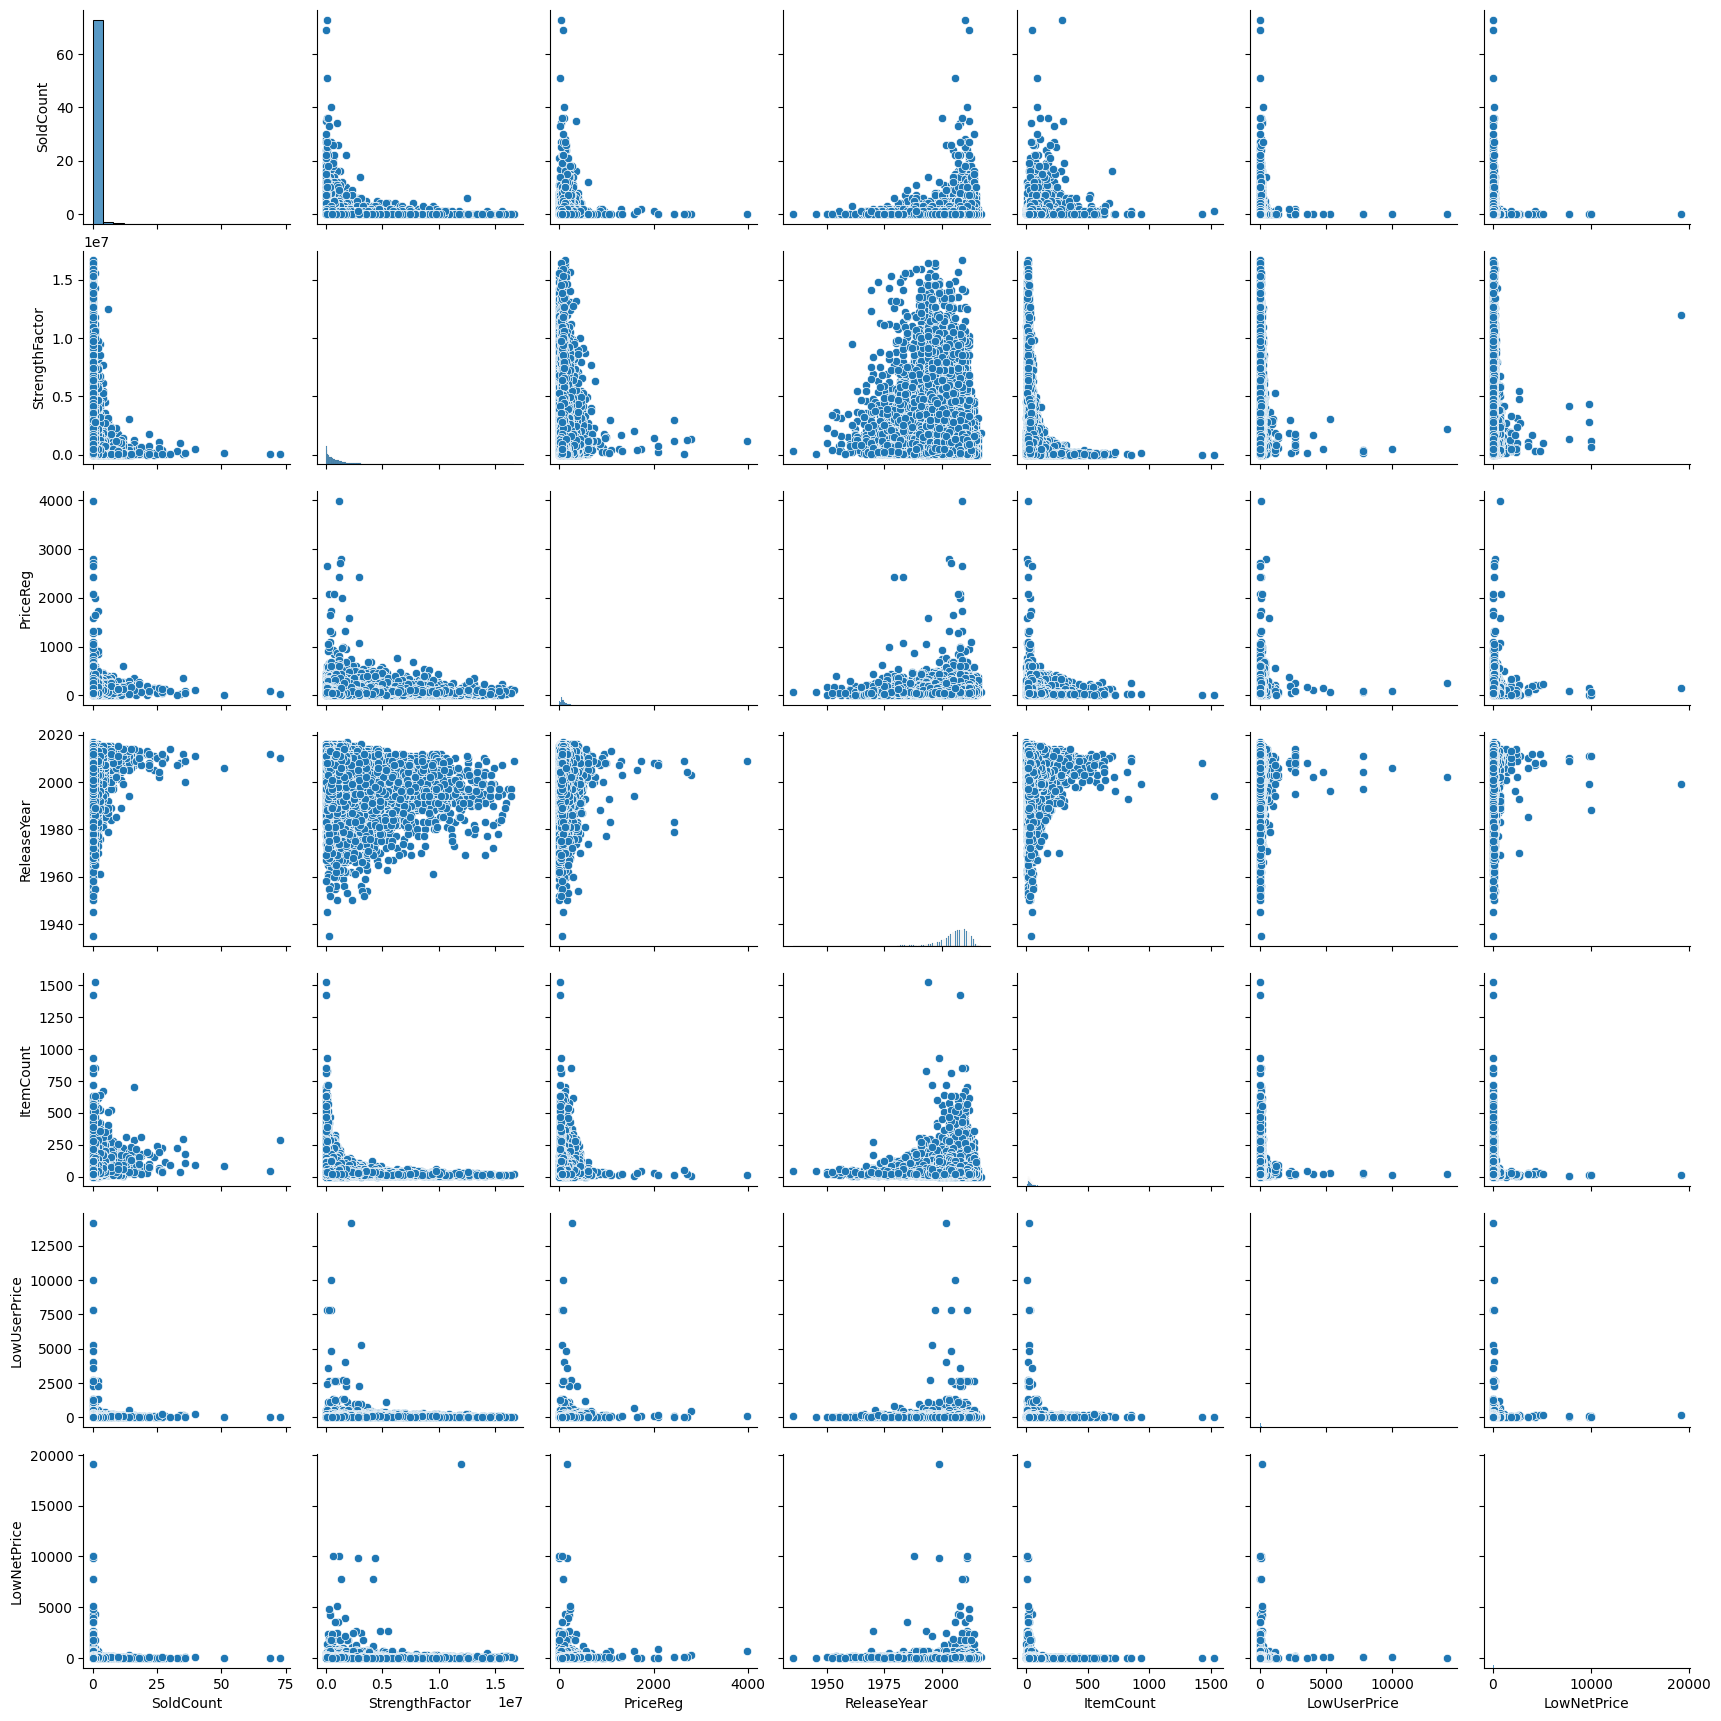

In [11]:
df_hist = df_hist.drop(['Order', 'File_Type','SKU_number','SoldFlag','MarketingType','ReleaseNumber','New_Release_Flag'], axis=1)
sns.pairplot(df_hist)

<Axes: >

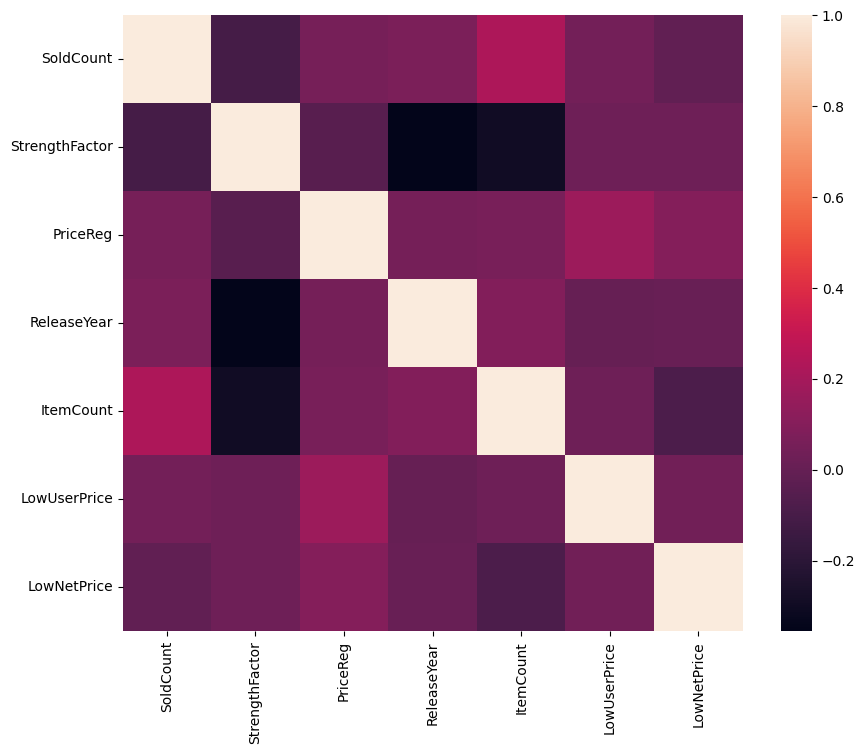

In [12]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df_hist.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

<ipython-input-13-d91cf9e754f1>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, ax=ax[i], rug=True, hist=False)
<ipython-input-13-d91cf9e754f1>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, ax=ax[i], rug=True, hist=False)
<ipython-input-13-d91cf9e754f1>:13: UserWarn

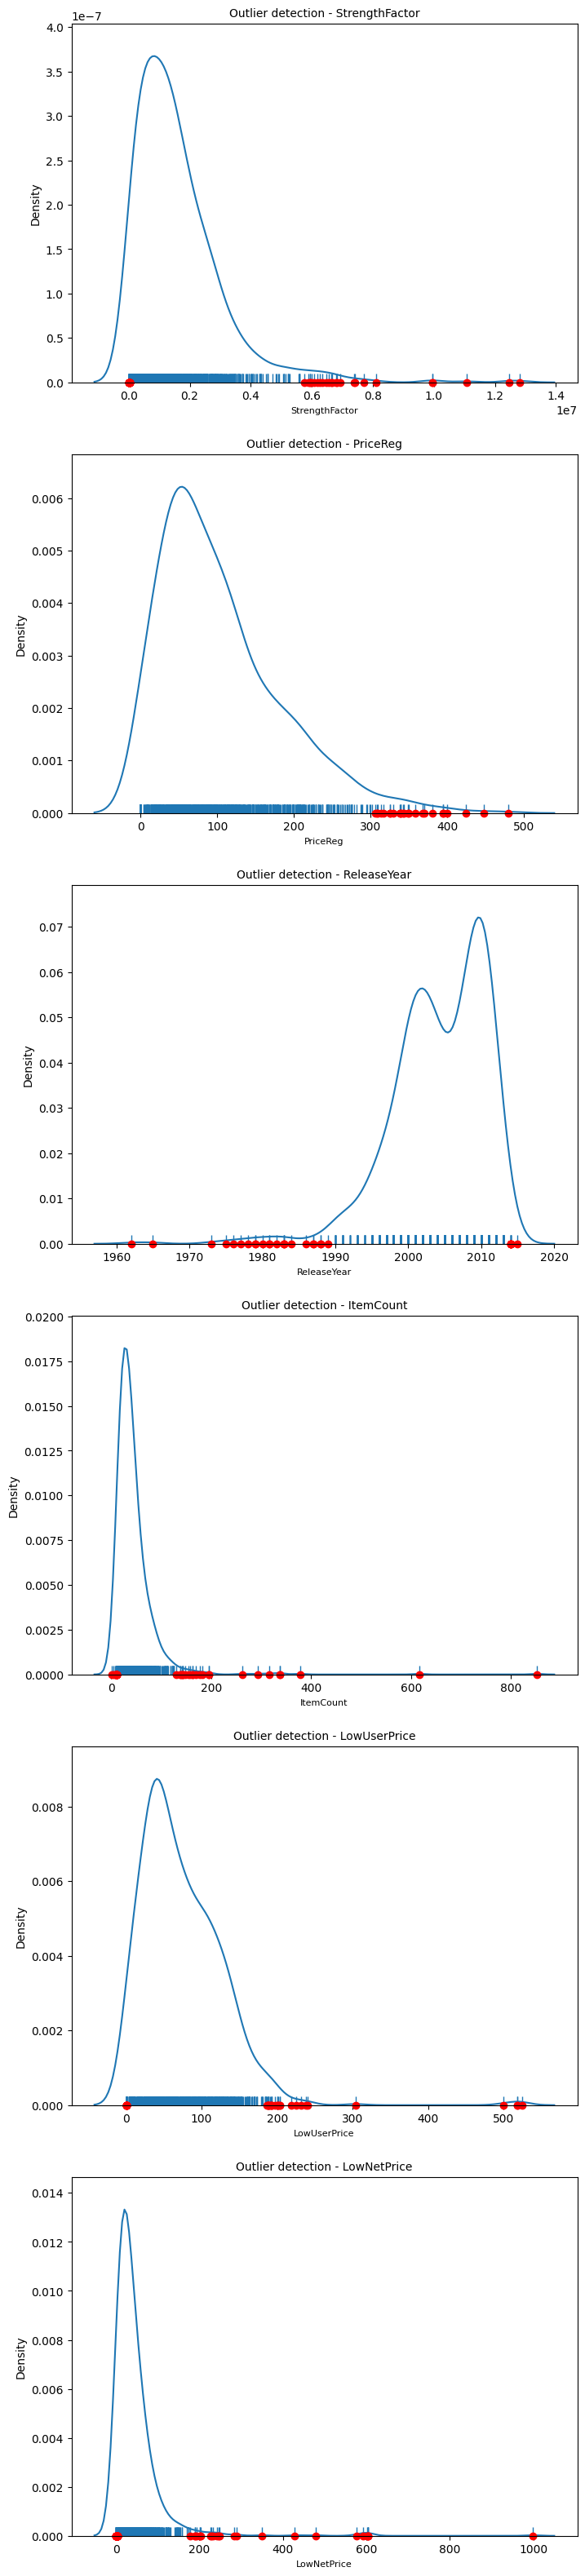

In [13]:
# Percentile based outlier removal
def percentile_based_outlier(df, threshold=95):
    diff = (100 - threshold) / 2.0
    minval, maxval = np.percentile(df, [diff, 100 - diff])
    return (df < minval) | (df > maxval)

col_names = ['StrengthFactor','PriceReg', 'ReleaseYear', 'ItemCount', 'LowUserPrice', 'LowNetPrice']

fig, ax = plt.subplots(len(col_names), figsize=(8,40))

for i, col_val in enumerate(col_names):
    x = df_hist[col_val][:1000]
    sns.distplot(x, ax=ax[i], rug=True, hist=False)
    outliers = x[percentile_based_outlier(x)]
    ax[i].plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    ax[i].set_title('Outlier detection - '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense


# Select only numeric columns
numeric_cols_act = df_act.select_dtypes(include=[np.number]).columns

# Prepare the features and target variable
X = df_act[numeric_cols_act].values
y = df_act['ItemCount'].values

# Normalize the features
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)

# Reshape input to be 3D [samples, timesteps, features]
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Create the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Model Loss: {loss:.2f}')


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2689/2689 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 2052.2390
Epoch 2/10
2689/2689 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 1114.0693
Epoch 3/10
2689/2689 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 1042.0471
Epoch 4/10
2689/2689 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 717.1293
Epoch 5/10
2689/2689 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 645.2661
Epoch 6/10
2689/2689 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 373.2218
Epoch 7/10
2689/2689 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 265.9294
Epoch 8/10
2689/2689 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 294.0988
Epoch 9/10
2689/2689 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 465.8161
Epoch 10/10
2689/2689 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 186.9492
1153/1153 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 121.4552
Model Loss: 111.95


In [15]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestClassifier

# Select only numeric columns that are still in df_act
numeric_cols_act = df_act.select_dtypes(include=[np.number]).columns

# Prepare the features and target variable
X = df_act[numeric_cols_act].values
y = df_act['ItemCount'].values

# Normalize the features
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)

# Reshape input to be 3D [samples, timesteps, features] for LSTM
X_scaled_lstm = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split the data into training and testing sets
X_train_lstm, X_test_lstm, y_train, y_test = train_test_split(X_scaled_lstm, y, test_size=0.3, random_state=42)
X_train_rf, X_test_rf, _, _ = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=32)
lstm_loss = lstm_model.evaluate(X_test_lstm, y_test)
print(f'LSTM Model Loss: {lstm_loss:.2f}')

# Train the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_rf, y_train)
y_pred = rf_model.predict(X_test_rf)
rf_mse = mean_squared_error(y_test, y_pred)
print(f'Random Forest Model MSE: {rf_mse:.2f}')


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2689/2689 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 1878.6395
Epoch 2/10
2689/2689 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 1335.8552
Epoch 3/10
2689/2689 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 1373.5485
Epoch 4/10
2689/2689 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 819.1567
Epoch 5/10
2689/2689 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 706.8833
Epoch 6/10
2689/2689 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 343.8726
Epoch 7/10
2689/2689 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 282.8811
Epoch 8/10
2689/2689 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 282.6698
Epoch 9/10
2689/2689 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 302.7534
Epoch 10/10
2689/2689 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 377.7660
1153/1153 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 120.5261
LSTM Model Loss: 110.99
Random Forest Model MSE: 0.09


In [16]:
from imblearn.over_sampling import SMOTE

# Converting maarketing type to categorical variable
df['MarketingType'] = df['MarketingType'].astype('category')
df['MarketingType'] = df['MarketingType'].cat.codes

# Assuming you want to predict 'SoldFlag' using features from df_hist

# Splitting the historical and active state
df_hist = df[df['File_Type'] == 'Historical']
df_act = df[df['File_Type'] == 'Active']

# Columns to remove
remove_col_val = ['Order', 'File_Type', 'SKU_number', 'SoldCount', 'ReleaseNumber', 'SoldFlag']

y = df_hist['SoldFlag']

df_hist = df_hist.drop(remove_col_val, axis=1)
df_act = df_act.drop(remove_col_val, axis=1)

# Create training and testing vars for the historical data
X_train, X_test, y_train, y_test = train_test_split(df_hist, y, test_size=0.2, random_state=12)
# Use the same random_state for consistency

# Now split the training data further for validation
x_train, x_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=12)
# Again, use the same random_state

# Balancing the classes using SMOTE
sm = SMOTE(random_state=12, sampling_strategy=1.0) # Adjusted parameter
X_train_res, y_train_res = sm.fit_resample(x_train, y_train) # Use x_train and y_train here


Class 0 numbers:  45349
Class 1 numbers:  45349
Validation Results
0.7495065789473684
0.5314617618586641

ROC AUC score
0.6635958012693406
Confusion matrix, without normalization
[[9887 2717]
 [1187 1409]]
Normalized confusion matrix
[[0.78 0.22]
 [0.46 0.54]]


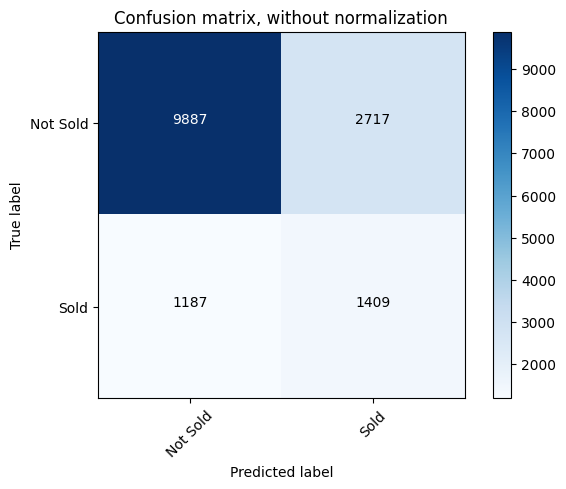

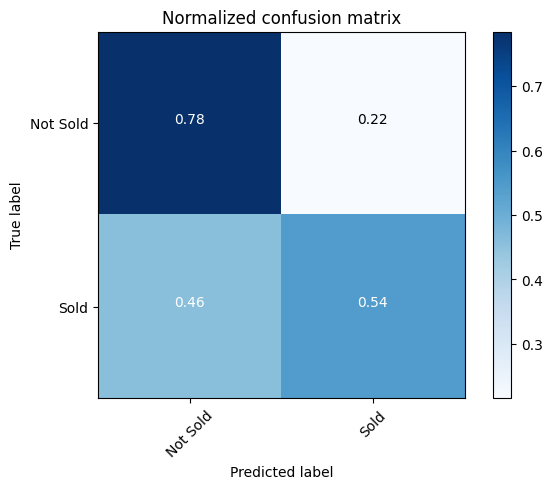

<ipython-input-17-ae8c7d50463a>:78: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  fpr["micro"], tpr["micro"], _ = roc_curve(testing_target.ravel(), y_score[:,1].ravel())


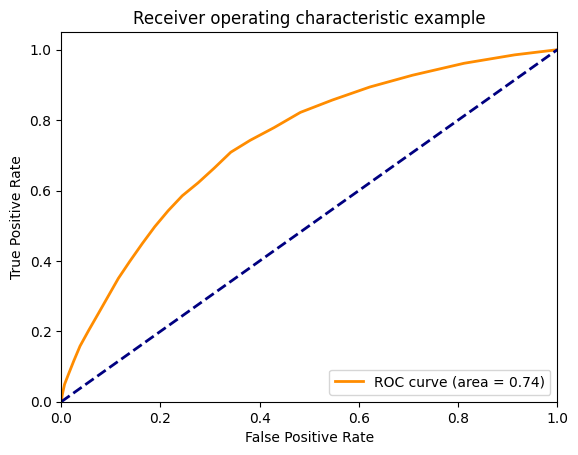

In [17]:
from sklearn.metrics import recall_score, roc_auc_score, confusion_matrix, roc_curve, auc
import itertools

print("Class 0 numbers: " , len(y_train_res[y_train_res==0.0]))
print("Class 1 numbers: " , len(y_train_res[y_train_res==1.0]))
clf_rf = RandomForestClassifier(n_estimators=25, random_state=12)
clf_rf.fit(X_train_res, y_train_res)
print('Validation Results')
print(clf_rf.score(x_val, y_val))
print(recall_score(y_val, clf_rf.predict(x_val)))

# Define testing_features and testing_target
testing_features = X_test
testing_target = y_test

# Predict on testing_features to get pred
pred = clf_rf.predict(testing_features) # This line is added

print('\nROC AUC score')
print(roc_auc_score(testing_target, pred))

class_names = ['Not Sold', 'Sold']
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(testing_target, pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 2
y_score = clf_rf.predict_proba(testing_features)

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(testing_target.ravel(), y_score[:,1].ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2

plt.plot(fpr['micro'], tpr['micro'], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc['micro'])

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [18]:
df['ReleaseYear'] = pd.to_datetime(df['ReleaseYear'], format='%Y', errors='coerce') # Changed to pd.to_datetime
df.set_index('ReleaseYear', inplace=True)

# Feature Engineering
df['ReleaseYear'] = df.index.year

# Preparing df for LSTM
def prepare_lstm_df(series, n_lags=30):
    X, y = [], []
    for i in range(len(series) - n_lags):
        X.append(series[i:i + n_lags])
        y.append(series[i + n_lags])
    return np.array(X), np.array(y)

SoldFlag = df['SoldFlag'].values
X_lstm, y_lstm = prepare_lstm_df(SoldFlag)

# Splitting df for LSTM
split = int(len(X_lstm) * 0.8)
X_train_lstm, X_test_lstm = X_lstm[:split], X_lstm[split:]
y_train_lstm, y_test_lstm = y_lstm[:split], y_lstm[split:]

# Reshape for LSTM (samples, time steps, features)
X_train_lstm = X_train_lstm.reshape(X_train_lstm.shape[0], X_train_lstm.shape[1], 1)
X_test_lstm = X_test_lstm.reshape(X_test_lstm.shape[0], X_test_lstm.shape[1], 1)

# LSTM Model
lstm_model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train_lstm.shape[1], 1)),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train_lstm, y_train_lstm, epochs=10, batch_size=32, verbose=1)

# LSTM Predictions
y_pred_lstm = lstm_model.predict(X_test_lstm)

# Preparing df for Random Forest
df['SoldFlag_lag_1'] = df['SoldFlag'].shift(1)
df['SoldFlag_lag_7'] = df['SoldFlag'].shift(7)
df.dropna(inplace=True)

X_rf = df[['SoldFlag_lag_1', 'SoldFlag_lag_7', 'ReleaseYear']]
y_rf = df['SoldFlag']

# Splitting df for Random Forest
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_rf, y_train_rf)

# Random Forest Predictions
y_pred_rf = rf_model.predict(X_test_rf)



Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4973/4973 ━━━━━━━━━━━━━━━━━━━━ 84s 16ms/step - loss: 0.0637
Epoch 2/10
4973/4973 ━━━━━━━━━━━━━━━━━━━━ 81s 16ms/step - loss: 0.0629
Epoch 3/10
4973/4973 ━━━━━━━━━━━━━━━━━━━━ 83s 16ms/step - loss: 0.0635
Epoch 4/10
4973/4973 ━━━━━━━━━━━━━━━━━━━━ 79s 16ms/step - loss: 0.0629
Epoch 5/10
4973/4973 ━━━━━━━━━━━━━━━━━━━━ 83s 16ms/step - loss: 0.0627
Epoch 6/10
4973/4973 ━━━━━━━━━━━━━━━━━━━━ 80s 16ms/step - loss: 0.0631
Epoch 7/10
4973/4973 ━━━━━━━━━━━━━━━━━━━━ 83s 16ms/step - loss: 0.0632
Epoch 8/10
4973/4973 ━━━━━━━━━━━━━━━━━━━━ 79s 16ms/step - loss: 0.0629
Epoch 9/10
4973/4973 ━━━━━━━━━━━━━━━━━━━━ 81s 16ms/step - loss: 0.0624
Epoch 10/10
4973/4973 ━━━━━━━━━━━━━━━━━━━━ 81s 16ms/step - loss: 0.0632
1244/1244 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step


LSTM Performance:
MAE: 0.00, RMSE: 0.00
Random Forest Performance:
MAE: 0.10, RMSE: 0.23
Inventory Turnover Ratio: 0.77


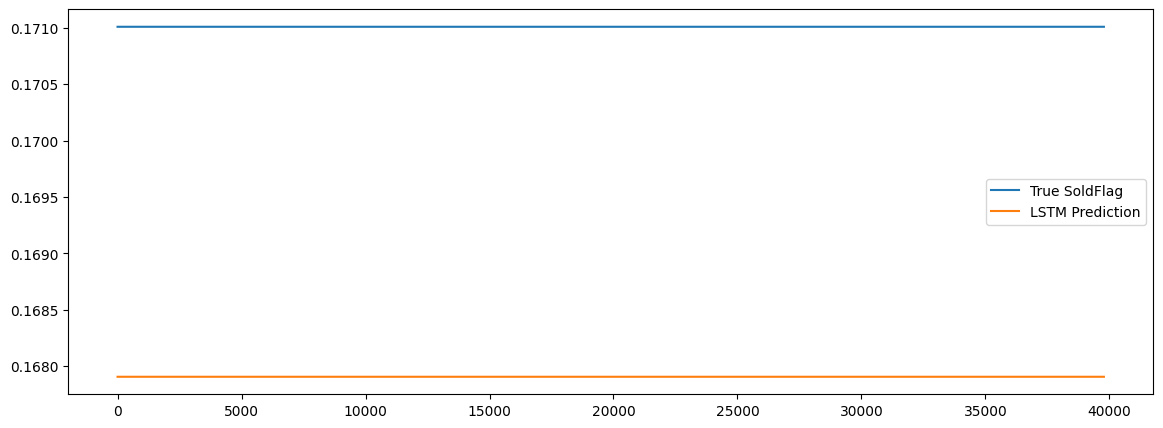

In [19]:
# Evaluation Metrics
def evaluate(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}")
    return mae, rmse

print("LSTM Performance:")
evaluate(y_test_lstm, y_pred_lstm[:len(y_test_lstm)])

print("Random Forest Performance:")
evaluate(y_test_rf, y_pred_rf)

# Inventory Turnover Ratio
inventory = np.maximum(y_test_rf - y_pred_rf, 0)  # Overstock
turnover_ratio = sum(y_test_rf) / sum(inventory + y_pred_rf)
print(f"Inventory Turnover Ratio: {turnover_ratio:.2f}")

# Plotting Results
plt.figure(figsize=(14, 5))
plt.plot(range(len(y_test_lstm)), y_test_lstm, label="True SoldFlag")
plt.plot(range(len(y_test_lstm)), y_pred_lstm[:len(y_test_lstm)], label="LSTM Prediction")
plt.legend()
plt.show()

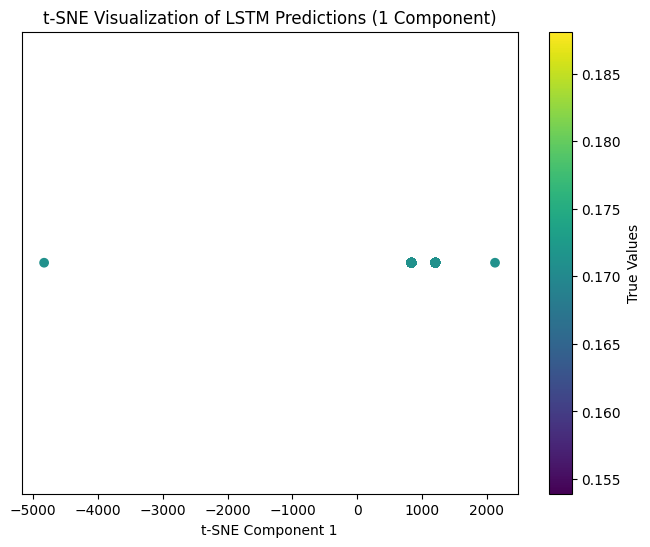

In [21]:
from sklearn.manifold import TSNE

# Apply t-SNE to the predictions, but set n_components to 1
tsne = TSNE(n_components=1, random_state=42)
tsne_results = tsne.fit_transform(y_pred_lstm)

# Plot the t-SNE results (adjust plotting accordingly for 1 dimension)
plt.figure(figsize=(8, 6))

# Instead of y_train.flatten(), use y_test_lstm, which is a NumPy array
plt.scatter(tsne_results[:, 0], np.zeros_like(tsne_results[:, 0]), c=y_test_lstm, cmap='viridis')

plt.colorbar(label='True Values')
plt.title('t-SNE Visualization of LSTM Predictions (1 Component)')
plt.xlabel('t-SNE Component 1')
plt.yticks([])  # Remove y-axis ticks since it's meaningless in 1D
plt.show()
